<a href="https://colab.research.google.com/github/KohsukeIde/numerical-calc/blob/main/%E6%95%B0%E5%80%A4%E8%A8%88%E7%AE%97%E6%B3%95_%E8%AA%B2%E9%A1%8C15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# a) Colebrookの管摩擦式を解くための数値計算法

Colebrookの管摩擦式は以下の形で与えられる：

1/√λ = -2.0 * log10(ε/(3.7d) + 2.51/(Re√λ))

この方程式は λ について陽に解くことができないため、数値的に解く必要がある。以下のステップに基づき、この方程式を解く。

1. 初期推定値の設定:
   - λ の初期値を設定する。例えば、λ₀ = 0.02 といった値を使用する。

2. 反復法の適用:
   - ニュートン法やセカント法などの反復法を使用して解を求める。
   - ここでは、単純で収束が速い固定点反復法を使用する。

3. 固定点反復法の実装:
   - 方程式を λ = f(λ) の形に変形する：
     λ = [1 / (-2.0 * log10(ε/(3.7d) + 2.51/(Re√λ)))]²
   - この式を用いて、λₙ₊₁ = f(λₙ) として反復計算を行う。

4. 収束判定:
   - |λₙ₊₁ - λₙ| < ε（ここで ε は許容誤差）となるまで反復を続ける。
   - または、最大反復回数に達した場合に計算を終了する。

5. 結果の出力:
   - 収束した λ の値を結果として出力する。


# b) Pythonプログラム

In [1]:
import math

def colebrook(Re, epsilon, d, max_iter=100, tol=1e-6):
    """
    Colebrookの管摩擦式を解くための関数

    引数:
    Re: レイノルズ数
    epsilon: 管の絶対粗さ [m]
    d: 管の直径 [m]
    max_iter: 最大反復回数
    tol: 収束判定の許容誤差

    戻り値:
    λ: 管摩擦係数
    """
    # 初期推定値
    lambda_old = 0.02

    for _ in range(max_iter):
        # Colebrook方程式の右辺
        right_side = -2.0 * math.log10(epsilon / (3.7 * d) + 2.51 / (Re * math.sqrt(lambda_old)))

        # λのアップデート
        lambda_new = 1.0 / (right_side ** 2)

        # 収束判定
        if abs(lambda_new - lambda_old) < tol:
            return lambda_new

        lambda_old = lambda_new

    raise ValueError("収束しませんでした。最大反復回数に達しました。")

# 使用例
Re = 1e5  # レイノルズ数
epsilon = 0.26e-3  # 管の絶対粗さ [m]
d = 1.3  # 管の直径 [m]

lambda_result = colebrook(Re, epsilon, d)
print(f"λ = {lambda_result:.6f}")

λ = 0.019006


# c) ε= 0.26, d = 1300 mmにおけるRe数でのλを計算し表で示す


In [2]:
import math
from tabulate import tabulate

def colebrook(Re, epsilon, d, max_iter=100, tol=1e-6):
    lambda_old = 0.02
    for _ in range(max_iter):
        right_side = -2.0 * math.log10(epsilon / (3.7 * d) + 2.51 / (Re * math.sqrt(lambda_old)))
        lambda_new = 1.0 / (right_side ** 2)
        if abs(lambda_new - lambda_old) < tol:
            return lambda_new
        lambda_old = lambda_new
    raise ValueError("収束しませんでした。最大反復回数に達しました。")

# パラメータ設定
epsilon = 0.26e-3  # 管の絶対粗さ [m]
d = 1.3  # 管の直径 [m]

# 計算するReynolds数のリスト
Re_list = [1e4, 4e4, 1e5, 4e5, 1e6, 4e6, 1e7]

# 結果リスト
results = []

# 各Reynolds数に対して λ を計算
for Re in Re_list:
    lambda_result = colebrook(Re, epsilon, d)
    results.append([f"{Re:.1e}", f"{lambda_result:.6f}"])

# 結果を表形式表示
headers = ["Reynolds数", "λ（管摩擦係数）"]
print(tabulate(results, headers=headers, tablefmt="grid"))

+--------------+-------------------+
|   Reynolds数 |   λ（管摩擦係数） |
+==============+===================+
|    10000     |          0.03119  |
+--------------+-------------------+
|    40000     |          0.022593 |
+--------------+-------------------+
|   100000     |          0.019006 |
+--------------+-------------------+
|   400000     |          0.01576  |
+--------------+-------------------+
|        1e+06 |          0.014683 |
+--------------+-------------------+
|        4e+06 |          0.013995 |
+--------------+-------------------+
|        1e+07 |          0.013838 |
+--------------+-------------------+


# d) c)のデータを用いて一つ以上の関数近似式を作成し、レイノルズ数の関数λ=(Re)を示すこと

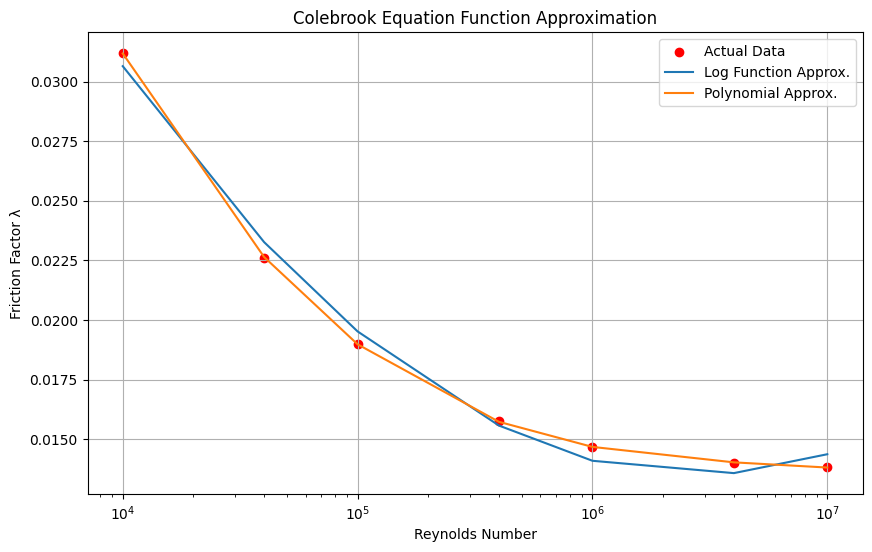

対数関数近似式:
λ = -0.015963 * log(Re) + 0.000537 * log(Re)^2 + 0.132093

多項式近似式:
λ = -7.427344e-04 * log10(Re)^3 + 1.508710e-02 * log10(Re)^2 + -1.026700e-01 * log10(Re) + 2.479967e-01

対数関数近似の平均二乗誤差: 2.64e-07
多項式近似の平均二乗誤差: 8.22e-10


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# c)から得られたデータを使用
Re_list = [10000, 40000, 100000, 400000, 1e6, 4e6, 1e7]
lambda_list = [0.03119, 0.022593, 0.019006, 0.01576, 0.014683, 0.013995, 0.013838]

# データ点をNumPy配列に変換
Re = np.array(Re_list)
lambda_values = np.array(lambda_list)

# 対数関数による近似
def log_func(x, a, b, c):
    return a * np.log(x) + b * np.log(x)**2 + c

log_params, _ = curve_fit(log_func, Re, lambda_values)

# 多項式近似（3次）
poly_params = np.polyfit(np.log10(Re), lambda_values, 3)
poly_func = np.poly1d(poly_params)

# グラフの作成
plt.figure(figsize=(10, 6))
plt.scatter(Re, lambda_values, color='red', label='Actual Data')
plt.plot(Re, log_func(Re, *log_params), label='Log Function Approx.')
plt.plot(Re, poly_func(np.log10(Re)), label='Polynomial Approx.')
plt.xscale('log')
plt.xlabel('Reynolds Number')
plt.ylabel('Friction Factor λ')
plt.title('Colebrook Equation Function Approximation')
plt.legend()
plt.grid(True)
plt.show()

# 近似式の表示
print("対数関数近似式:")
print(f"λ = {log_params[0]:.6f} * log(Re) + {log_params[1]:.6f} * log(Re)^2 + {log_params[2]:.6f}")

print("\n多項式近似式:")
print(f"λ = {poly_params[0]:.6e} * log10(Re)^3 + {poly_params[1]:.6e} * log10(Re)^2 + {poly_params[2]:.6e} * log10(Re) + {poly_params[3]:.6e}")

# 近似精度の評価（平均二乗誤差）
log_mse = np.mean((lambda_values - log_func(Re, *log_params))**2)
poly_mse = np.mean((lambda_values - poly_func(np.log10(Re)))**2)

print(f"\n対数関数近似の平均二乗誤差: {log_mse:.2e}")
print(f"多項式近似の平均二乗誤差: {poly_mse:.2e}")

# e) c)のデータと d)の関数近似による結果を比較して考察をすること

# Colebrook方程式の近似結果の考察

## 1. グラフの全体的な傾向

グラフから、Reynolds数の増加に伴い摩擦係数λが減少する傾向が明確に観察できる。これは、流れが層流から乱流に遷移し、相対的な摩擦損失が減少することを示している。

## 2. 近似手法の比較

### 2.1 対数関数近似
対数関数近似（λ = -0.015963 * log(Re) + 0.000537 * log(Re)^2 + 0.132093）は、低Reynolds数域（10^4〜10^5）では実データとよく一致している。しかし、高Reynolds数域（10^6以上）では若干の乖離が見られ、特に10^7付近で再び上昇する傾向を示している。

### 2.2 多項式近似（3次）
多項式近似（λ = -7.427344e-04 * log10(Re)^3 + 1.508710e-02 * log10(Re)^2 + -1.026700e-01 * log10(Re) + 2.479967e-01）は、全体的に実データによく適合している。特に中間から高Reynolds数域（10^5〜10^7）での適合性が高いことが観察される。

## 3. 近似精度の評価

近似精度を評価するため、平均二乗誤差を計算した結果、対数関数近似では2.64e-07、多項式近似では8.22e-10となった。この結果から、多項式近似の方が平均二乗誤差が小さく、全体的により高い精度で実データを再現していることがわかる。

## 4. 各近似手法の特徴と適用範囲

### 4.1 対数関数近似
対数関数近似は、簡潔な形式で全体的な傾向を捉えている。この近似は物理的な意味合いが解釈しやすく、Reynolds数の対数に対する摩擦係数の変化を直接表現している。特に中間のReynolds数域での精度が高い特徴があると考えられる。

### 4.2 多項式近似
多項式近似は、より柔軟に曲線の形状を再現できる特徴がある。特に高Reynolds数域での適合性が高いことが観察される。

## 5. 結論

本考察により、両近似手法ともColebrook方程式の挙動を良好に再現していることが分かった。多項式近似の方が全体的に高い精度を示しているが、対数関数近似も簡潔さと物理的解釈のしやすさという利点がある。

このことから、用途に応じて適切な近似手法を選択することが重要である。簡易計算や概略的な傾向把握には対数関数近似が適している一方、より高精度な数値が必要な場合や広いReynolds数範囲での計算には多項式近似が適していると考えられる。
しかし、いずれの近似式を用いる場合も、適用範囲（10^4 ≤ Re ≤ 10^7）を考慮し、外挿には注意する必要がある。